In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, set_link_color_palette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture as GM
import dc_stat_think as dcst
import dabest
sep = '/'
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='#f2efef'

In [3]:
font = {'fontname':'Calibri'}

## Load the dataset

In [4]:
recording = r'E:\CIT_WAY\dat_files\cat\csvs'
filename ='neuron_stats.csv'

In [5]:
df = pd.read_csv(os.sep.join([recording, filename]))
df.index.name = 'Cluster_ID'
df = df[pd.notnull(df['SW_troff'])]

In [6]:
df_cit = df[(df['recording']=='Chronic_04_2018-08-05')|(df['recording']=='Chronic_30_2018-07-28')|(df['recording']=='Chronic_40_2018-08-13')|(df['recording']=='Chronic_41_2018-08-09')]
df_cit = df_cit[(df_cit['CV ISI'] != 0)&(df_cit['Firing Rate'] != 0)]

## Scale the values for FR and CV ISI

In [8]:
scale =RobustScaler()
scaled_data = scale.fit_transform(df[['CV ISI', 'Firing Rate']])
data_for_dendrogram = linkage(scaled_data)

#### Cut off score for dendrogram

In [13]:
distance = 1

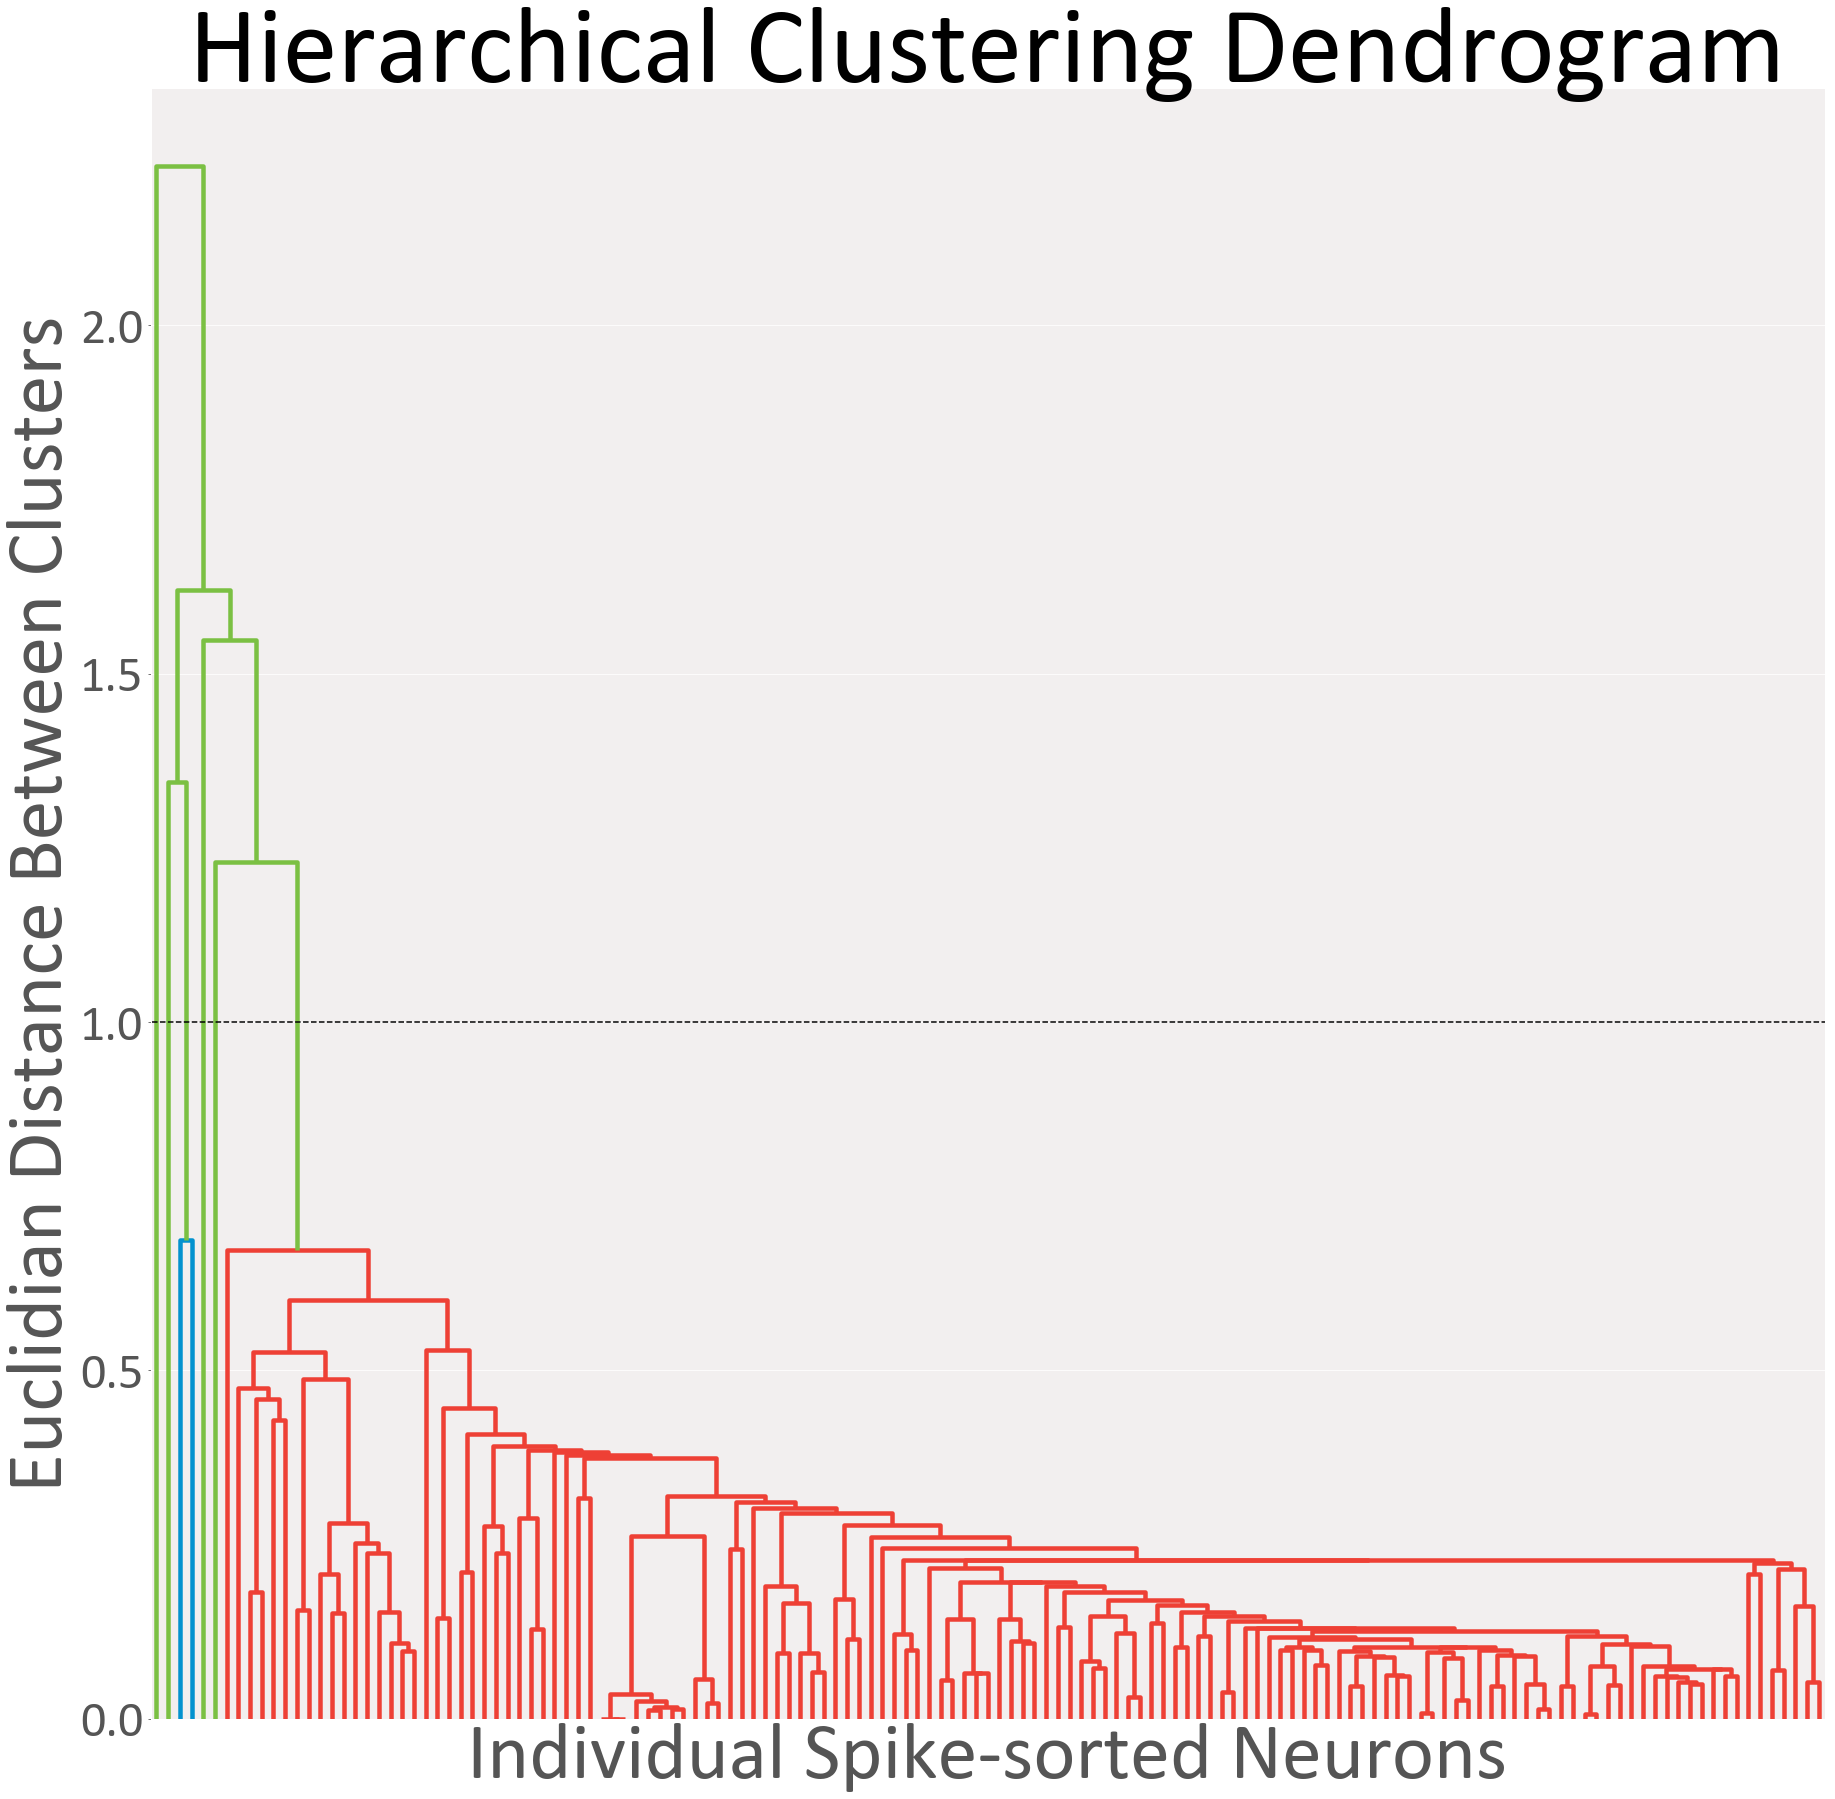

In [14]:
f, ax = plt.subplots(figsize=(30, 30))
ax.set_title('Hierarchical Clustering Dendrogram', **font, fontsize=110)
ax.set_ylabel('Euclidian Distance Between Clusters', **font, fontsize=80)
set_link_color_palette(['#0392cf', '#ee4035', '#9932CC'])

with plt.rc_context({'lines.linewidth':4.5}):
    dendrogram(
        data_for_dendrogram,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        color_threshold=distance,
        above_threshold_color='#7bc043',
        no_labels = True,
        distance_sort = True,
        ax=ax
    )
ax.set_xlabel('Individual Spike-sorted Neurons', **font, fontsize=80)
plt.yticks(**font, fontsize=50)
line_y = np.ones(df.shape[0]*30) * distance
line_x = np.linspace(1, df.shape[0]*60, df.shape[0]*30)
plt.plot(line_x, line_y, linestyle='--', color='k')
#plt.xlabel('Cluster')
#plt.tight_layout()
#plt.savefig(os.sep.join([path, 'Dendrogram', 'Dendrogram.png']), dpi=600)
plt.show()